# STAT40800 Midterm Assignment
## Exploratory data analysis of the Irish weather

For this assignment you will perform an exploratory data analysis (EDA) of historic weather data from Met Eireann, Ireland's main meteorological service.

### Instructions
* Solutions must be submitted on Brightspace under *Assessments* $\rightarrow$ *Midterm Assignment*.
* Your submission must include your completed Jupyter notebook in .ipynb **and** PDF format. To create a PDF of your notebook select *File* $\rightarrow$ *Download as* $\rightarrow$ *PDF via LaTeX (.pdf)*. \[Alternatively *Save and export Notebook as* $\rightarrow$ *PDF*\]
* All of the results that you wish to include should be viewable without running the Python code. Note that the code may still be run by the grader to check that it functions properly and as intended.
* Marks will be awarded for complete and correct answers to all 9 questions. An additional 10 marks will be reserved for organisation, presentation and conciseness.
* For full marks, you must justify your answers, clearly explain all steps and computations, label your figures, and write concise code.
* The assignment must be completed individually. 


This assignment is **due at 11:59pm on November 3rd, 2024**.

In [18]:
# Load in necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load in the weather_1819.csv dataset into Python as a pandas DataFrame. Describe the data. How many years of recordings are included? What is the temporal resolution of the data? Which weather measurements are reported? (8 marks)

### Loading the data

In [19]:
df = pd.read_csv("weather_1819.csv",skiprows=11)
df.head()

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
0,1,jan,2018,Dublin Airport,7.5,3.2,0.6,18.5,41.0,2.7
1,2,jan,2018,Dublin Airport,11.1,3.4,8.4,17.0,54.0,0.8
2,3,jan,2018,Dublin Airport,8.1,4.6,1.3,23.8,51.0,0.9
3,4,jan,2018,Dublin Airport,9.3,3.4,10.7,14.6,48.0,1.3
4,5,jan,2018,Dublin Airport,6.7,-1.0,0.0,6.6,16.0,3.3


In [20]:
print(df.shape)
print(df['year'].unique())

(2920, 10)
[2018 2019]


***
The data is read using pd.read_csv. The first few rows are skipped using skiprows = 11. The data is printed with .head() method.

**df.shape** gives the information about the number of rows and columns in the data. The dataframe has 2920 rows of data with 10 columns.

Using **.unique()** on df['year'] gives [2018,2019]. The data is included for 2 years, 2018 - 2019.

The temporal resolution of this dataset is **daily**. The data contains day wise recordings of weather information from Jan to Dec for the years 2018 and 2019 for 4 different stations, Dublin airport, Shannon airport, Cork airport, and Knock airport.

Weather Measurements like max air temperature, min air temperature, amount of rain, mean daily wind speed, highest gust, hours of sunlight are reported in the data.
***

2. Determine how many missing values there are in each column of the dataset. Can you think of a reason why these values are missing? Discuss different strategies for filling the missing values, highlighting the advantages and disadvantages of each strategy, in the context of this dataset. (8 marks)

    **Note:** You do not need to implement any of your suggested strategies.

In [21]:
df.isna().sum()

day         0
month       0
year        0
station     0
maxtp      18
mintp      18
rain       23
wdsp        5
hg         16
sun         7
dtype: int64

***
**df.isna()** gives the rows a true or false for each value in the dataframe. Combining **.sum()** which sums the true values in each column and gives the count. (True is taken as 1 here).

The above output shows the column wise count of the missing values.
There are several possible reasons for the missing values. Instrument failures may have occurred on certain days during data recording, or data corruption might have happened during storage or transfer.
There are a lot of different ways to fill in these missing values.

1. We can fill the missing values with the mean or median of the data. This is can work for numerical data, like the one we have. And the percentage of missing values are relatively low compared to the overall dataset.

2. We can fill the missing values with zeroes if we know zeroes can actually be a posibility for those records. 

3. We can drop the rows which have missing values. This can work especially when the missing data is not huge and thus removing them wont affect the analysis. This method can be used for our dataset as we dont have that many missing values.

4. We can use a regression model to predict the missing values if we have another column to which the relationship is strong. This is only useful if the correlation between the columns are high so the model can give a good prediction.
***

3. Write code to answer the following questions: (15 marks)
    1. At what station and on what date was the highest wind speed recorded?
    1. At what station and on what date was the highest maximum air temperature recorded?
    1. At what station and on what date was the largest amount of rain recorded?

In [22]:
df.loc[df["wdsp"].idxmax()][["day","month","year","station","wdsp"]]

day                     2
month                 mar
year                 2018
station    Dublin Airport
wdsp                 28.5
Name: 60, dtype: object

In [23]:
df.loc[df["maxtp"].idxmax()][["day","month","year","station","maxtp"]]

day                     28
month                  jun
year                  2018
station    Shannon Airport
maxtp                 32.0
Name: 908, dtype: object

In [24]:
df.loc[df["rain"].idxmax()][["day","month","year","station","rain"]]

day                  15
month               apr
year               2019
station    Cork Airport
rain               54.6
Name: 1929, dtype: object

***
**df['attribute'].idmax()** returns the index of the highest value for the attribute. We use **.loc** outside the expression to locate the row with the maximum value and we display the necessary columns.
1.  Highest wind speed was recorded at Dublin Airport with a value of 28.5.

2.  Highest maximum air temperature was recorded at Shannon Airport with a value of 32.0.

3.  Highest amount of rain was recorded at Cork Airport with a value of 54.6.
***

4. Create a numerical summary (mean, standard deviation, minimum, maximum, etc.) for each of the weather measurements. Discuss and interpret your results. (8 marks)

In [25]:
df[["maxtp","mintp","rain","wdsp","hg","sun"]].describe()

,maxtp,mintp,rain,wdsp,hg,sun
count,2902.000000,2902.000000,2897.000000,2915.000000,2904.000000,2913.000000
mean,13.283150,6.432977,3.063583,9.481475,25.443871,3.783797
std,5.146289,4.368755,5.053881,3.820605,9.278313,3.850012
min,-1.800000,-7.000000,0.000000,2.300000,7.000000,0.000000
25%,9.500000,3.100000,0.000000,6.500000,19.000000,0.300000
50%,12.800000,6.400000,0.700000,8.900000,24.000000,2.600000
75%,17.100000,9.600000,4.000000,11.800000,30.000000,6.300000
max,32.000000,18.900000,54.600000,28.500000,84.000000,15.900000


***
**.describe()** functions is used to get the numberical summary for the data.

1. Looking at the 50% values(median) for each weather measurements, they are all relatively close to the middle expect for the rain attibute which is close to the 25% value. This means that the distribution of rain is skewed to the right. This is also shown below in the density plot of the rain attribute. The graph is skewed to the right.

2. For the rain, wdsp and the hg attributes, the max value is a lot higher than the 75% value. This probably means that the data has outliers.

3. The standard deviation is highest for the hg attribute. This means that the IQR will be large. Also means that the data for the hg attribute has a lot of variance.
***

<Axes: xlabel='rain', ylabel='Density'>

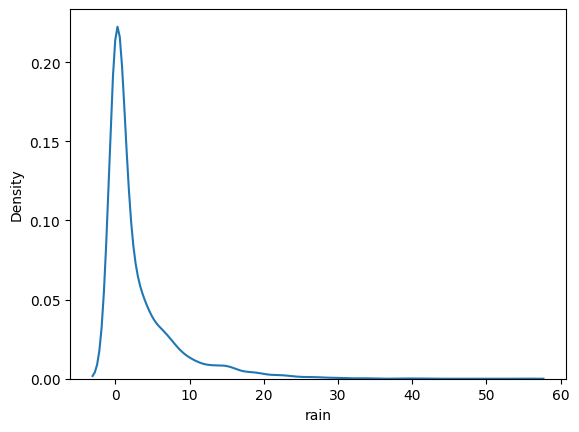

In [41]:
sns.kdeplot(df,x="rain")

5. Create a graphical summary for each of the weather measurements. Discuss your plots in relation to the summary statistics found in question 4. (10 marks)

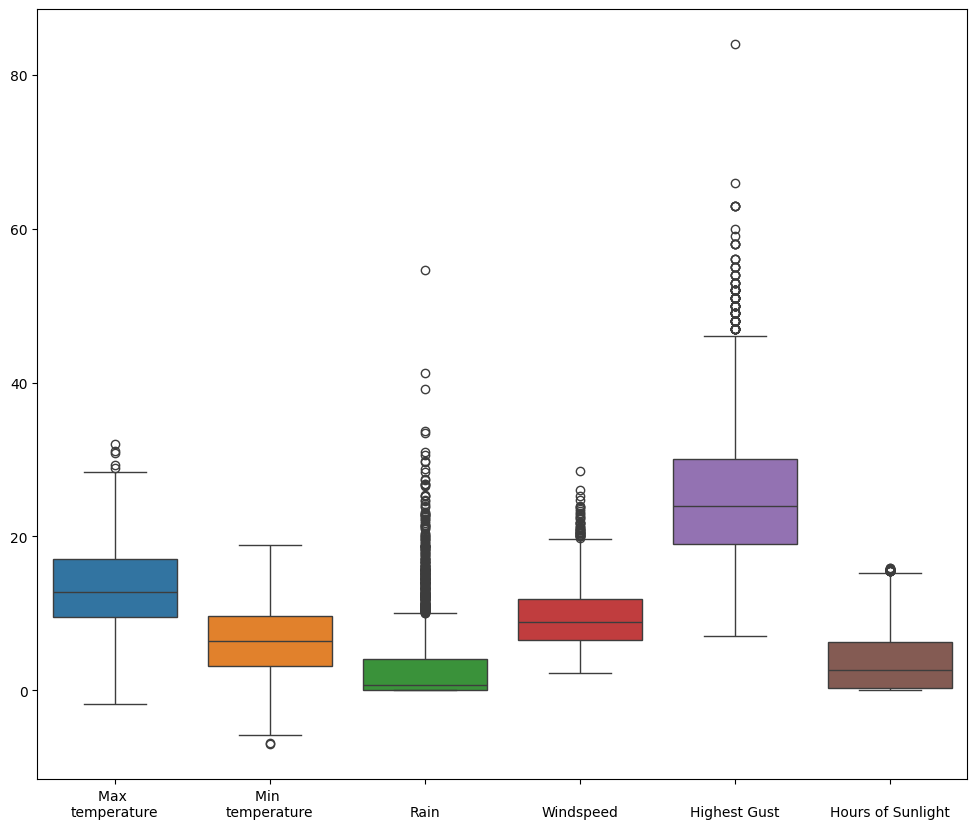

In [43]:
# sns.pairplot(df[["month","station","maxtp","mintp","rain","wdsp","hg","sun"]],hue="station")
plt.figure(figsize=(12,10))
axis = sns.boxplot(df[["maxtp","mintp","rain","wdsp","hg","sun"]])
axis.set_xticks(range(len(df[["maxtp","mintp","rain","wdsp","hg","sun"]].columns)))
axis.set_xticklabels(["Max \ntemperature","Min \ntemperature","\nRain","\nWindspeed","\nHighest Gust","\nHours of Sunlight"]);

***
We use the sns.boxplot() on the filtered df[["maxtp","mintp","rain","wdsp","hg","sun"]] to show the boxplots for the different weather measurements. We use set_xticks() and set_xticklabels() to set the Y labels.

1. Observing the boxplot, the middle 50% of the data is closer to the 25th percentile, as indicated in the numerical summary, resulting in a right-skewed distribution.

2. The rain, wind speed, and highest gust data show a significant number of outliers, consistent with the findings from the numerical summary.

3. For the highest gust, the IQR spans a larger range, as noted in the numerical summary, indicating a high variance in the data.
***

6. Produce a scatter plot of the mean wind speed versus the highest gust and colour your points based on month. Interpret your plot. (8 marks)

Text(0.5, 1.0, 'Windspeed vs Highest Gust')

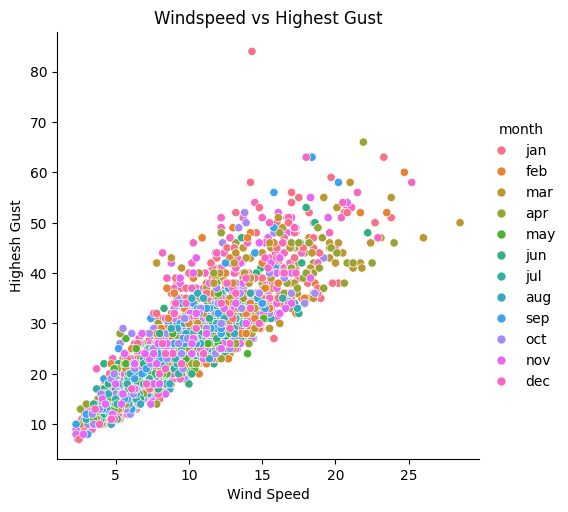

In [27]:
sns.relplot(data=df,x="wdsp",y="hg",hue="month")
plt.xlabel("Wind Speed")
plt.ylabel("Highesh Gust")
plt.title("Windspeed vs Highest Gust")

***
We use **sns.relplot** to plot the scatter plot between wind speed and the highest gust. The coloring is done by the **hue** attribute.

There seems to be a positive relationship between wind speed and the highest gust. As wind speed increases, the highest gust also increases. Coming to the month wise analysis, there doesn't seem to be any direct relation between the month and the two attributes. The values are all distributed fairly randomly across all the months. The month doesn't seem to affect the values of the wind speed and the highest gust.
***

7. Compute the daily temperature range, and add this as an additional variable to your DataFrame. Print out the last 10 rows of your DataFrame to show that the column has been added correctly. (5 marks)

In [28]:
df["Temperature range"] = df["maxtp"] - df["mintp"]
df.tail(10)

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,Temperature range
2910,22,dec,2019,Knock Airport,7.0,2.7,4.8,8.0,20.0,3.1,4.3
2911,23,dec,2019,Knock Airport,6.9,3.0,5.0,10.5,29.0,2.7,3.9
2912,24,dec,2019,Knock Airport,6.6,3.1,0.7,8.4,24.0,2.9,3.5
2913,25,dec,2019,Knock Airport,4.9,1.4,0.0,9.0,32.0,0.0,3.5
2914,26,dec,2019,Knock Airport,10.0,4.8,6.2,12.2,34.0,0.0,5.2
2915,27,dec,2019,Knock Airport,10.8,9.8,3.7,12.8,29.0,0.0,1.0
2916,28,dec,2019,Knock Airport,9.8,7.9,0.0,14.8,30.0,0.0,1.9
2917,29,dec,2019,Knock Airport,10.5,7.0,0.0,12.8,32.0,0.1,3.5
2918,30,dec,2019,Knock Airport,9.6,3.4,NaN,8.4,21.0,0.0,6.2
2919,31,dec,2019,Knock Airport,6.0,1.3,0.0,7.1,18.0,2.1,4.7


***
Adding a new column **Temperature range** as the difference between **maxtp** and **mintp**.

**.tail(10)** gives the last 10 rows.
***

8. Plot the daily temperature range versus the hours of sunlight per day, colouring the points based on month. Interpret your plot. (8 marks)

Text(0.5, 1.0, 'Temperature Range vs Hours of Sunlight per day')

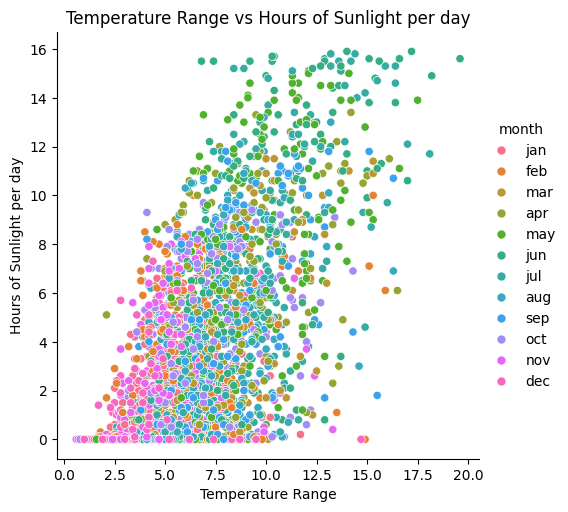

In [29]:
sns.relplot(data=df,x="Temperature range",y="sun",hue="month")
plt.ylabel("Hours of Sunlight per day")
plt.xlabel("Temperature Range")
plt.title("Temperature Range vs Hours of Sunlight per day")

***
We use **sns.relplot** to plot the relationship between the temperature range and the Hours of sunlight. The colouring of the points based on the month is done by the **hue** attribute.

We see a positive relationship between the Temperature range and the hours of sunlight per day. Looking at the distribution with respect to the month, the temperature range and the hours of sunlight are lower for the colder months of oct, nov, dec, jan. We see them increase as we get to the hotter months of apr, may, jun, jul which have high hours of sunlight per day as well as higher temperature ranges.
***

9. Perform a comparative analysis of the weather at Dublin Airport, Shannon Airport and Cork Airport. (20 marks)

    For full marks on this question you should create numerical and graphical summaries of the weather measurements at each weather station and discuss how the weather differs (or is similar) across these locations. 

In [31]:
df_dublin = df.loc[df["station"]=="Dublin Airport"]
df_cork = df.loc[df["station"]=="Cork Airport"]
df_shannon = df.loc[df["station"]=="Shannon Airport"]

***
Separating the data into a data frame for each station using the **.loc** and passing a boolean condition for each station.

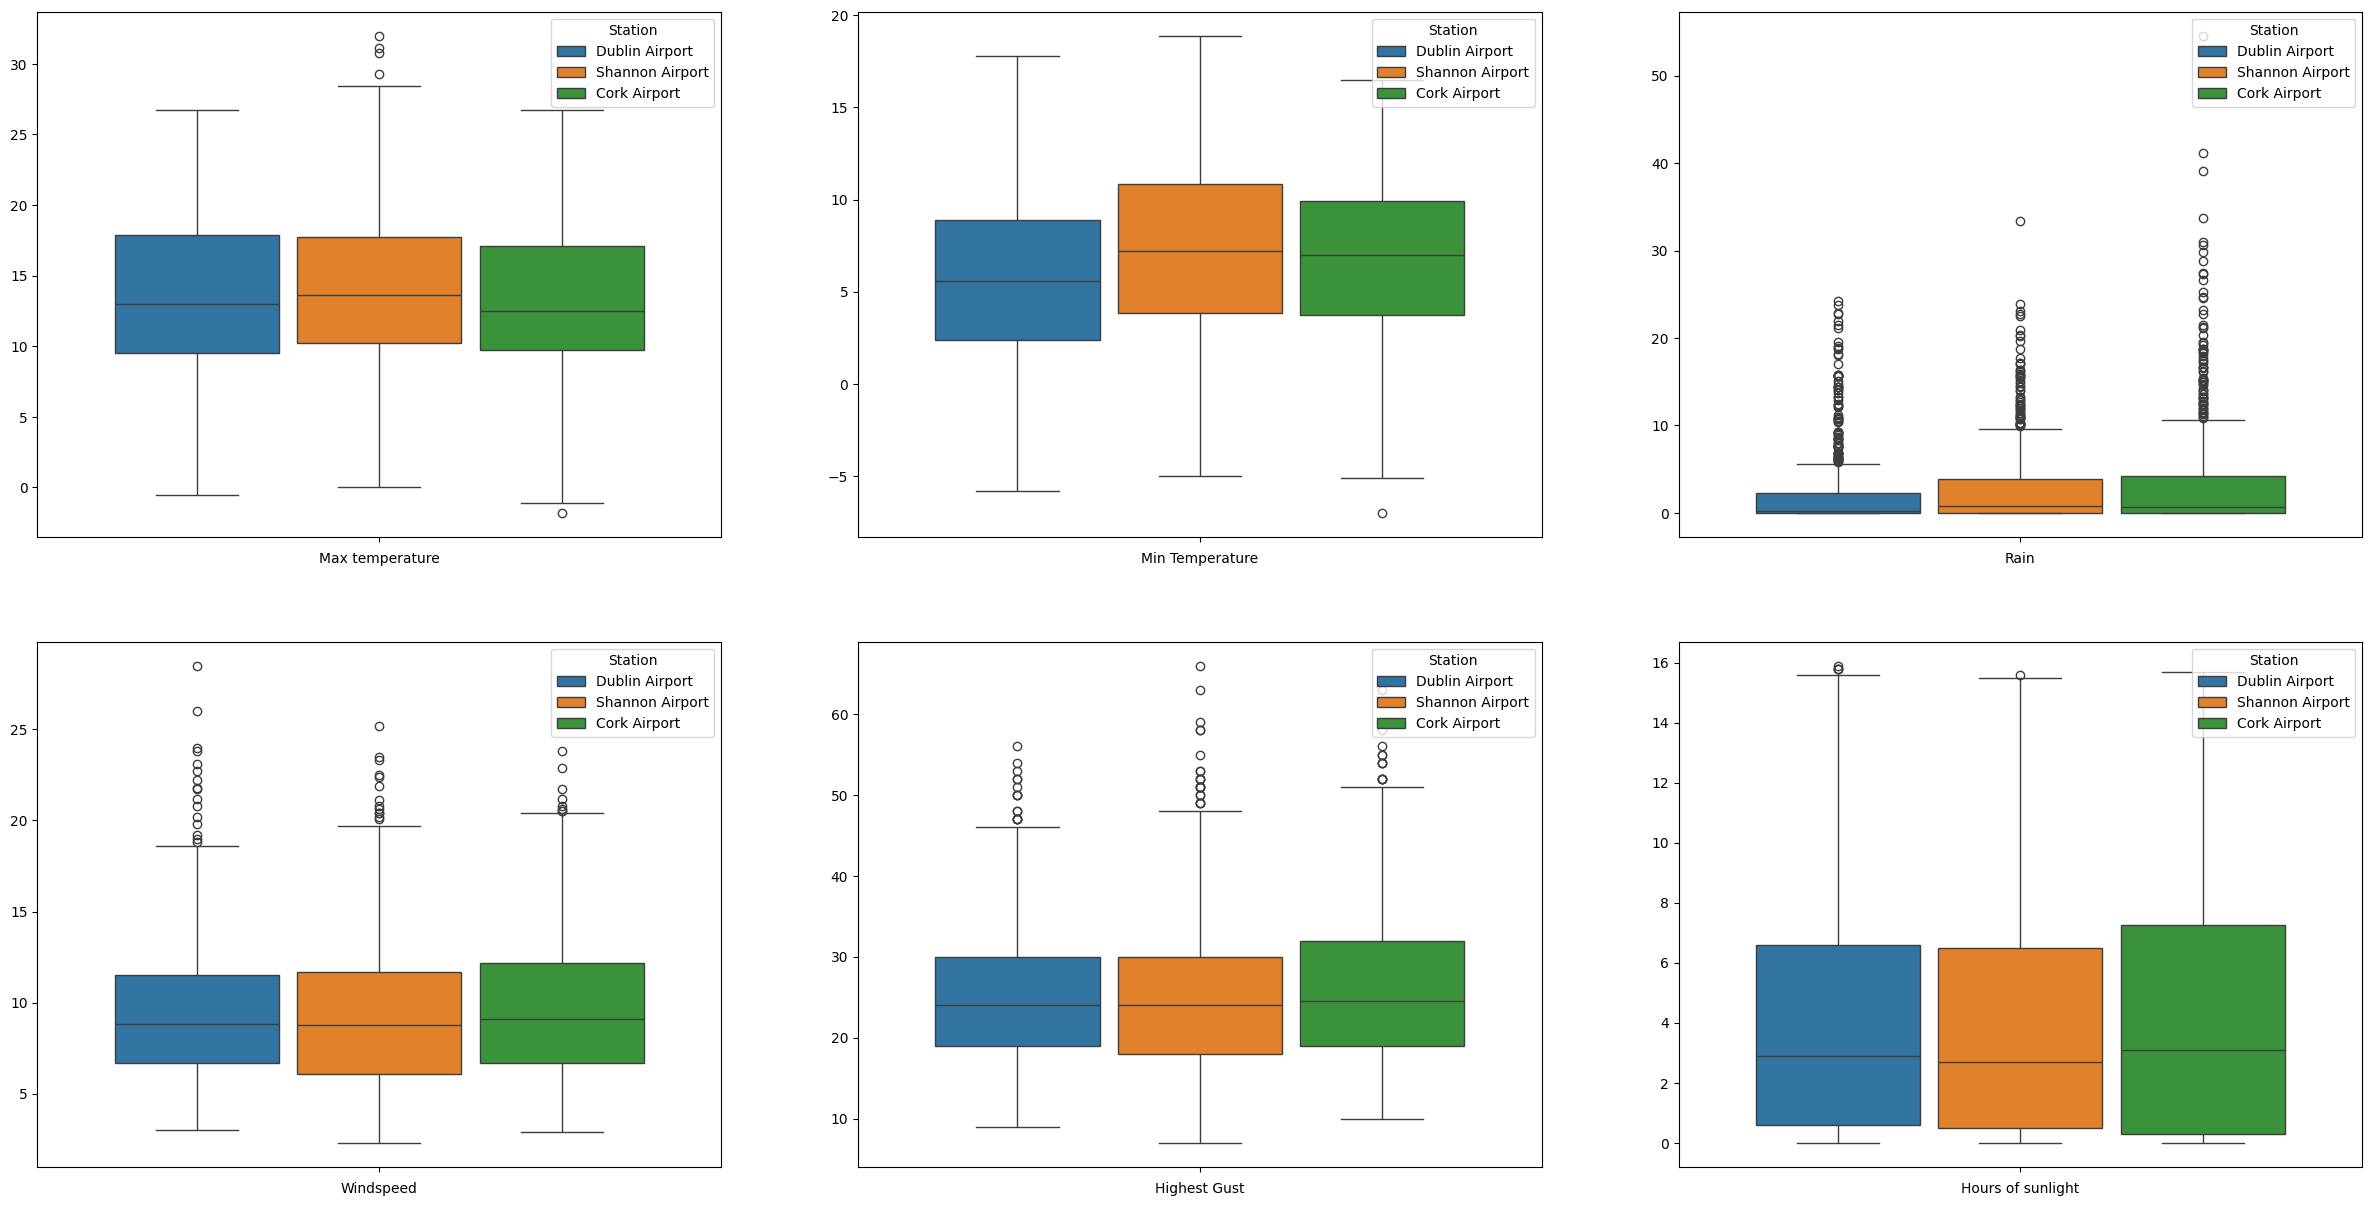

In [38]:
df_knock_removed = df.loc[df["station"]!="Knock Airport"]
columns = ["maxtp","mintp","rain","wdsp","hg","sun"]
names = ["Max temperature","Min Temperature","Rain","Windspeed","Highest Gust","Hours of sunlight"]

plt.subplots(2,3,figsize=(30,15))

for i,j in enumerate(columns):
    plt.subplot(2,3,i+1)
    ax = sns.boxplot(df_knock_removed,y=j,hue="station",fill=True,gap=.1)
    plt.xlabel(names[i])
    plt.ylabel("")
    plt.legend(title="Station")
    sns.move_legend(ax,"upper right")

In [33]:
df_dublin[["maxtp","mintp","rain","wdsp","hg","sun"]].describe()

,maxtp,mintp,rain,wdsp,hg,sun
count,730.000000,730.000000,726.000000,728.000000,728.000000,729.000000
mean,13.592603,5.724247,2.147383,9.542720,24.943681,4.046091
std,5.265505,4.488748,4.120571,3.829729,8.438033,3.952654
min,-0.500000,-5.800000,0.000000,3.000000,9.000000,0.000000
25%,9.500000,2.400000,0.000000,6.700000,19.000000,0.600000
50%,13.000000,5.600000,0.200000,8.800000,24.000000,2.900000
75%,17.875000,8.900000,2.300000,11.500000,30.000000,6.600000
max,26.700000,17.800000,24.200000,28.500000,56.000000,15.900000


In [34]:
df_cork[["maxtp","mintp","rain","wdsp","hg","sun"]].describe()

,maxtp,mintp,rain,wdsp,hg,sun
count,723.000000,723.000000,723.000000,728.000000,726.000000,727.000000
mean,13.262517,6.955325,3.470124,9.758516,25.976584,4.225860
std,4.894583,4.203288,6.137343,3.749587,9.336514,4.055068
min,-1.800000,-7.000000,0.000000,2.900000,10.000000,0.000000
25%,9.750000,3.750000,0.000000,6.700000,19.000000,0.300000
50%,12.500000,7.000000,0.700000,9.100000,24.500000,3.100000
75%,17.100000,9.900000,4.250000,12.200000,32.000000,7.250000
max,26.700000,16.500000,54.600000,23.800000,63.000000,15.700000


In [35]:
df_shannon[["maxtp","mintp","rain","wdsp","hg","sun"]].describe()

,maxtp,mintp,rain,wdsp,hg,sun
count,723.000000,723.000000,721.000000,730.000000,724.000000,728.000000
mean,14.160028,7.267082,2.844383,9.264658,24.968232,3.900275
std,5.106169,4.442844,4.402685,4.013313,9.576674,3.883124
min,0.000000,-5.000000,0.000000,2.300000,7.000000,0.000000
25%,10.250000,3.850000,0.000000,6.100000,18.000000,0.500000
50%,13.600000,7.200000,0.800000,8.750000,24.000000,2.700000
75%,17.750000,10.850000,3.900000,11.700000,30.000000,6.500000
max,32.000000,18.900000,33.400000,25.200000,66.000000,15.600000


These are the box plots for each weather measurement separated into each station. This is plotted using seaborn's **sns.boxplot** function separating into different station using the **hue** argument. The plot is divided into 6 subplots for each measurement using the **subplots** function with **2 rows** and **3 columns**. Looping through each measurement, the plot is plotted into the different the subplots.

Comparing the plots, the weather data seems relatively similar across all the three station which we can also see in the summary for the three stations below.

1. Max Temperature: The average maximum temperatures for the three airports are as follows: Dublin at 13.59°C, Cork at 13.26°C, and Shannon at 14.16°C, as also observed in the graph above. The median temperature at Shannon airport is slightly higher than the other two, resulting in a right-skewed distribution. Shannon also recorded the highest maximum temperature at 32.0°C, with a few outliers visible on its boxplot.

2. Min Temperature: The mean minimum temperatures are Dublin at 5.72°C, Cork at 6.95°C, and Shannon at 7.26°C. Dublin shows a lower minimum trend overall, while Cork recorded the lowest value within the outlier range at -7.0°C.

3. Rainfall: Rainfall data reveals many outliers. The means are Dublin at 2.14 mm, Cork at 3.47 mm, and Shannon at 2.84 mm. The interquartile ranges (IQRs) for all three airports cover only a small part of the boxplot, with numerous outliers outside the whiskers. Dublin received the least rainfall overall, with a shorter IQR compared to the others, while Cork recorded the highest individual rainfall amount.

4. Wind Speed: Wind speed shows a consistent distribution across the three airports, with occasional outliers above the whiskers on the boxplot. The averages are Dublin at 9.54 m/s, Cork at 9.75 m/s, and Shannon at 9.26 m/s. Cork’s median is slightly higher than the others. Dublin has the highest wind speed recorded, though it lies within the outlier range. Within the whisker range, Cork has the highest wind speed due to its longer upper whisker.

5. Highest Gust: Gust data mirrors wind speed distributions. The means are Dublin at 24.94 m/s, Cork at 25.97 m/s, and Shannon at 24.96 m/s. Dublin and Shannon display similar patterns with a few outliers, while Cork recorded the highest gust within the whisker range. Shannon has the highest individual gust at 66.0 m/s, classified as an outlier.

6. Hours of Sunlight: The mean sunlight hours are Dublin at 4.04, Cork at 4.22, and Shannon at 3.90. Distributions are quite similar across all three airports, with whiskers extending to higher values in the boxplot. Dublin has a few outliers marked in the boxplot.
***